## Step 1 : Problem Statement
- Predict the insurance charges based on available features

In [2]:
# Check current python version
!python -V

Python 3.12.0


In [3]:
import sys
import os
# Go one level up to access files from parent directory
sys.path.append(os.path.abspath(".."))

In [4]:
# Load CSV_FILEPATH
from config import CSV_FILEPATH

In [5]:
# load required basic Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# This ensures plots are rendered inline within the notebook.
%matplotlib inline

# To Supress Warnings
import warnings
warnings.filterwarnings(action='ignore')

## Step 2 : Data Gathering 
- Read and load data from available dataset

In [6]:
df = pd.read_csv(CSV_FILEPATH)
df

,age,gender,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [7]:
type(df)

pandas.core.frame.DataFrame

## Step 3 : EDA(Exploratory data analysis) 

In [8]:
# info of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   gender    1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [9]:
# Columns
df.columns

Index(['age', 'gender', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [10]:
# Check for null values
df.isna().sum()

age         0
gender      0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

#### 1. Outlier Handling

<Axes: ylabel='bmi'>

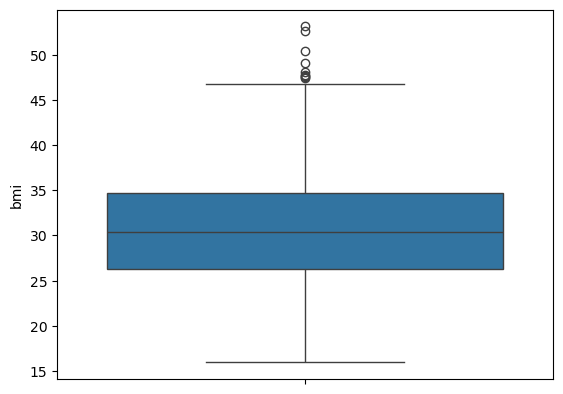

In [11]:
sns.boxplot(df['bmi'])
# plt.show()

<Axes: >

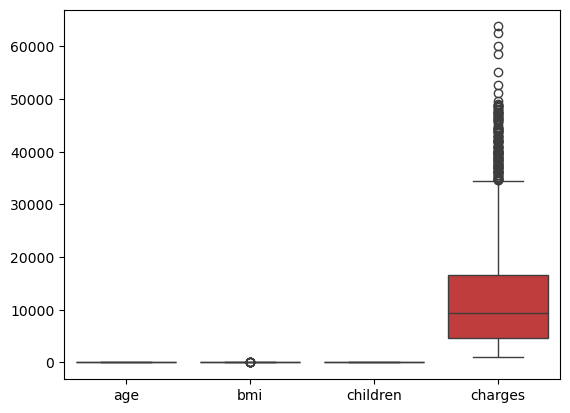

In [12]:
sns.boxplot(df)

## Step 4 : Feature Engineering

#### 1. Encoding of categorical columns

In [13]:
# gender, smoker, region are object datatype ML algo not accept categorical values
# We need to encode this values

In [14]:
df['gender'].value_counts().to_dict()

{'male': 676, 'female': 662}

In [15]:
df['gender'].replace({'male': 1, 'female': 0}, inplace=True)

In [16]:
df['smoker'].value_counts().to_dict()

{'no': 1064, 'yes': 274}

In [17]:
df['smoker'].replace(to_replace={'no': 0, 'yes': 1}, inplace=True)

In [18]:
df['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [19]:
# region column in nominal data need to do OHE

In [20]:
df = pd.get_dummies(df, columns=['region'], dtype=int)
df.head()

,age,gender,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0


In [21]:
df.shape

(1338, 10)

#### 2 . Check for Assumption 

In [22]:
# check corr()
df.corr()

,age,gender,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.299008,0.002475,-0.000407,-0.011642,0.010016
gender,-0.020856,1.000000,0.046371,0.017163,0.076185,0.057292,-0.002425,-0.011156,0.017117,-0.004184
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.198341,-0.138156,-0.135996,0.270025,-0.006205
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.067998,-0.022808,0.024806,-0.023066,0.021914
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,0.787251,0.002811,-0.036945,0.068498,-0.036945
charges,0.299008,0.057292,0.198341,0.067998,0.787251,1.000000,0.006349,-0.039905,0.073982,-0.043210
region_northeast,0.002475,-0.002425,-0.138156,-0.022808,0.002811,0.006349,1.000000,-0.320177,-0.345561,-0.320177
region_northwest,-0.000407,-0.011156,-0.135996,0.024806,-0.036945,-0.039905,-0.320177,1.000000,-0.346265,-0.320829
region_southeast,-0.011642,0.017117,0.270025,-0.023066,0.068498,0.073982,-0.345561,-0.346265,1.000000,-0.346265
region_southwest,0.010016,-0.004184,-0.006205,0.021914,-0.036945,-0.043210,-0.320177,-0.320829,-0.346265,1.000000


<Axes: >

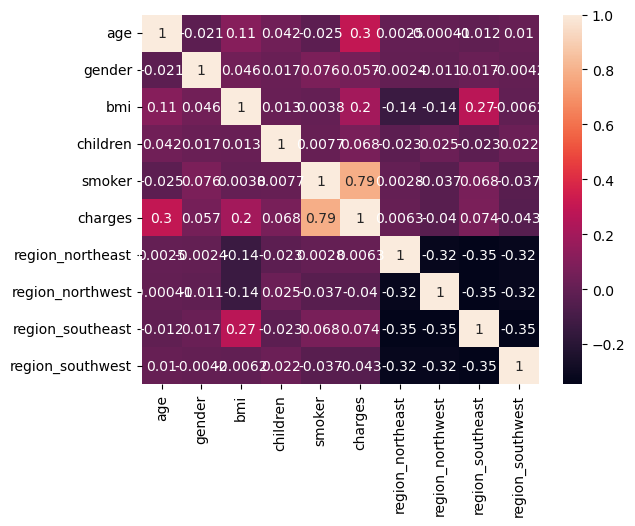

In [23]:
sns.heatmap(data=df.corr(), annot=True)

In [24]:
# cal VIF (variable inflation factor)

In [25]:
# Split dependent and independent data
X = df.drop('charges', axis=1)
y = df['charges']

In [26]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
vif

[1.0168221490038107,
 1.008900162100573,
 1.1066297324286174,
 1.0040106421370243,
 1.0120736649061481,
 8.603068768898916,
 8.636204844042899,
 11.535194994662813,
 9.218448877575907]

In [27]:
s1 = pd.Series(vif, index = X.columns)
s1.sort_values(ascending=False)

region_southeast    11.535195
region_southwest     9.218449
region_northwest     8.636205
region_northeast     8.603069
bmi                  1.106630
age                  1.016822
smoker               1.012074
gender               1.008900
children             1.004011
dtype: float64

#### 3. Feature Scaling
- Standard Scaling

In [28]:
# Before Doing Scaling First split Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1003, 9), (335, 9), (1003,), (335,))

In [29]:
# Do Scaling
from sklearn.preprocessing import StandardScaler, MinMaxScaler
std_scale = StandardScaler()
X_train_scale = std_scale.fit_transform(X_train)  # to avoid data leakage
X_test_scale = std_scale.transform(X_test)

#### Always trained model with dataframe or all function of model cant be used

In [30]:
# Create Dataframe of train and test separately
X_train_scale = pd.DataFrame(X_train_scale, columns=X_train.columns, index=X_train.index)
X_test_scale = pd.DataFrame(X_test_scale, columns=X_test.columns, index=X_test.index)

## Step 5 : Feature Selection

In [31]:
# use filter, wrapper and Embedded method

## Step 6 : Model Training 

In [32]:
# Built LinearRegression, KNeighborsRegressor

In [33]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

#### 1. LinearRegression

In [34]:
# X_train_scale

In [35]:
# model traning
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression(n_jobs=-1)
lr_model.fit(X_train_scale, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,-1
,positive,False


In [36]:
# for training data
lr_model.score(X_train_scale, y_train)

0.7449555328228536

In [37]:
# For testing data
lr_model.score(X_test_scale, y_test)

0.7672642952734356

## Step 7 : Model Evaluation

In [38]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [39]:
# for training data
y_pred_train = lr_model.predict(X_train_scale)
def model_eval(y_train, y_pred_train):
    mse = mean_squared_error(y_train, y_pred_train)
    print('MSE :' , mse)
    mae = mean_absolute_error(y_train, y_pred_train)
    print('MAE :', mae)
    rmse = np.sqrt(mse)
    print('RMSE : ', rmse)
    r2 = r2_score(y_train, y_pred_train)
    print('R2_score :', r2)
    n,k = X_train.shape
    adj_r2 = 1 - (((1-r2)*(n-1))/(n-k-1))
    print("Adjusted R2 Value: ", adj_r2)

model_eval(y_train, y_pred_train)

MSE : 37004502.18409475
MAE : 4183.153367011974
RMSE :  6083.132596294014
R2_score : 0.7449555328228536
Adjusted R2 Value:  0.7426439515493448


In [40]:
# for testing data
y_pred_test = lr_model.predict(X_test_scale)
def model_eval(y_test, y_pred_test):
    mse = mean_squared_error(y_test, y_pred_test)
    print('MSE :' , mse)
    mae = mean_absolute_error(y_test, y_pred_test)
    print('MAE :', mae)
    rmse = np.sqrt(mse)
    print('RMSE : ', rmse)
    r2 = r2_score(y_test, y_pred_test)
    print('R2_score :', r2)
    n,k = X_train.shape
    adj_r2 = 1 - (((1-r2)*(n-1))/(n-k-1))
    print("Adjusted R2 Value: ", adj_r2)

model_eval(y_test, y_pred_test)

MSE : 35117755.736136325
MAE : 4243.654116653146
RMSE :  5926.023602394469
R2_score : 0.7672642952734356
Adjusted R2 Value:  0.7651549082215332


#### 2. KNN Regression

In [41]:
from sklearn.neighbors import KNeighborsRegressor

knn_reg = KNeighborsRegressor()
knn_reg.fit(X_train_scale, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [42]:
# for training data
y_pred_train = knn_reg.predict(X_train_scale)
def model_eval(y_train, y_pred_train):
    mse = mean_squared_error(y_train, y_pred_train)
    print('MSE :' , mse)
    mae = mean_absolute_error(y_train, y_pred_train)
    print('MAE :', mae)
    rmse = np.sqrt(mse)
    print('RMSE : ', rmse)
    r2 = r2_score(y_train, y_pred_train)
    print('R2_score :', r2)
    n,k = X_train.shape
    adj_r2 = 1 - (((1-r2)*(n-1))/(n-k-1))
    print("Adjusted R2 Value: ", adj_r2)

model_eval(y_train, y_pred_train)

MSE : 20569020.960642554
MAE : 2734.9679009870392
RMSE :  4535.308254203076
R2_score : 0.8582330613403719
Adjusted R2 Value:  0.8569481646153602


In [43]:
# for testing data
y_pred_test = knn_reg.predict(X_test_scale)
def model_eval(y_test, y_pred_test):
    mse = mean_squared_error(y_test, y_pred_test)
    print('MSE :' , mse)
    mae = mean_absolute_error(y_test, y_pred_test)
    print('MAE :', mae)
    rmse = np.sqrt(mse)
    print('RMSE : ', rmse)
    r2 = r2_score(y_test, y_pred_test)
    print('R2_score :', r2)
    n,k = X_train.shape
    adj_r2 = 1 - (((1-r2)*(n-1))/(n-k-1))
    print("Adjusted R2 Value: ", adj_r2)

model_eval(y_test, y_pred_test)

MSE : 30545117.381525457
MAE : 3485.4959269641786
RMSE :  5526.763734910825
R2_score : 0.7975685156773892
Adjusted R2 Value:  0.7957337892333776


#### Hyperparameter Tuning

In [44]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [45]:
# opt_model
hyp = {
    'n_neighbors' : range(1,10,1),
    'weights': ['uniform', 'distance'],
    'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size' : range(10,50,10),
    'p' : [2,1],
}

gscv_knn = GridSearchCV(knn_reg, hyp, cv=5, verbose=1)
gscv_knn.fit(X_train_scale, y_train)

Fitting 5 folds for each of 576 candidates, totalling 2880 fits


,estimator,KNeighborsRegressor()
,param_grid,"{'algorithm': ['auto', 'ball_tree', ...], 'leaf_size': range(10, 50, 10), 'n_neighbors': range(1, 10), 'p': [2, 1], ...}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_neighbors,8


In [46]:
knn_reg = gscv_knn.best_estimator_
knn_reg.fit(X_train_scale, y_train)

,n_neighbors,8
,weights,'distance'
,algorithm,'ball_tree'
,leaf_size,20
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [47]:
# For Training data
y_pred_train = knn_reg.predict(X_train_scale)
model_eval(y_train, y_pred_train)

MSE : 182648.17106092346
MAE : 19.084122482552342
RMSE :  427.37357318969015
R2_score : 0.9987411422200098
Adjusted R2 Value:  0.9987297326328799


In [48]:
# For Testing data
y_pred_test = knn_reg.predict(X_test_scale)
model_eval(y_test, y_pred_test)

MSE : 27939288.858798046
MAE : 3245.0355375033073
RMSE :  5285.762845493358
R2_score : 0.8148381083640734
Adjusted R2 Value:  0.8131599039081587


## Step 8 : API Creation

## Step 9 : Model Deployment

In [49]:
# creating pickle and json files

In [50]:
import pickle
import json

In [51]:
import os
os.getcwd()

'C:\\Users\\akash\\Data_Science_Class_Notebooks\\Projects\\PythonEnv\\medical_insurance_LR\\notebooks'

In [52]:
#  for flask we need this file
# Make sure 'artifacts' folder exists (relative to notebook)
os.makedirs('../artifacts', exist_ok=True)

with open(r'../artifacts/lr_model.pkl','wb') as fp:
    pickle.dump(lr_model, fp)

In [53]:
#  for flask we need this file
label_enc_data = {"smoker" : {'no': 0, 'yes': 1},
                "gender" : {'male':1, 'female':0}}

with open(r'../artifacts/label_enc_data.json', 'w') as f:
    json.dump(label_enc_data,f)

In [54]:
#  to map columns in flask
columns_list = list(X.columns)

In [55]:
d1 = {'columns': columns_list}
# d1
import json
with open(r'../artifacts/feature.json','w') as file:
    json.dump(d1,file)